# **1. Bussiness understanding**
From [the competion overvies](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview),
- **Project Overview** : This project, titled "LLM - Detect AI Generated Text," involves the development of a machine learning model capable of distinguishing between essays written by students and those generated by large language models (LLMs). The motivation behind the project is the increasing sophistication of LLMs, which raises concerns about their potential impact on education, particularly in terms of plagiarism and the alteration of students' skill development. The project is hosted on Kaggle in collaboration with Vanderbilt University and The Learning Agency Lab.
    
- **Problem Statement** : The main problem addressed in this project is the detection of AI-generated text, specifically essays produced by LLMs, and distinguishing them from essays authored by students. The proliferation of LLMs has led to concerns about potential academic issues such as plagiarism and the impact on students' learning. The task is to build a model that can accurately identify whether a given essay was written by a student or generated by an LLM.

    
- **Metrics** : The evaluation of the model's performance will be based on **[the area under the ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve**. This metric provides a comprehensive measure of the model's ability to distinguish between student-written and LLM-generated essays. The choice of this metric aligns with the binary classification nature of the problem, and the ROC curve is particularly suitable for assessing the trade-off between true positive rate and false positive rate.

    Additionally, for the Efficiency Prize, an efficiency score is defined as a combination of model performance, runtime, and the absence of GPU usage. This score is designed to reward models that not only perform well but also demonstrate efficiency, addressing potential computational limitations in real-world educational contexts.

# **2. Data understanding**
From [the dataset description](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data)
- **Data Exploration** : The competition dataset comprises about 10,000 essays, some written by students and some generated by a variety of large language models (LLMs). The goal of the competition is to determine whether or not essay was generated by an LLM.
    All of the essays were written in response to one of seven essay prompts. In each prompt, the students were instructed to read one or more source texts and then write a response. This same information may or may not have been provided as input to an LLM when generating an essay.
    Essays from two of the prompts compose the training set; the remaining essays compose the hidden test set. Nearly all of the training set essays were written by students, with only a few generated essays given as examples. You may wish to generate more essays to use as training data.
    Please note that this is a [Code Competition](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview/code-requirements). The data in `test_essays.csv` is only dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about 9,000 essays in the test set, both student written and LLM generated.
    
    - **{test|train}_essays.csv**
        - `id` - A unique identifier for each essay.
        - `prompt_id` - Identifies the prompt the essay was written in response to.
        - `text` - The essay text itself.
        - `generated` - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in `test_essays.csv`.
    - **train_prompts.csv** - Essays were written in response to information in these fields.
        - `prompt_id` - A unique identifier for each prompt.
        - `prompt_name` - The title of the prompt.
        - `instructions` - The instructions given to students.
        - `source_text` - The text of the article(s) the essays were written in response to, in Markdown format. Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, as in `0 Paragraph one.\n\n1 Paragraph two.`. Essays sometimes refer to a paragraph by its numeral. Each article is preceded with its title in a heading, like `# Title`. When an author is indicated, their name will be given in the title after `by`. Not all articles have authors indicated. An article may have subheadings indicated like `## Subheading`.
    - **sample_submission.csv** - A submission file in the correct format. See the [Evaluation](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview/evaluation) page for details
    
    
- **Data Visualization** : 
    Shown below.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')
df_train_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')

df_test_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
df_sample_submission = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv')

In [3]:
def describe_dataframe(df):
    print("df.head: ")
    display(df.head())
    print("")
    
    print("df.describe: ")
    display(df.describe())
    print("")
    
    print("df.info: ")
    display(df.info())
    print("")
    
    print("Shape:\n {}".format(df.shape))
    print("")
    
    print("Rate of NA:\n {}".format(df.isna().sum()/len(df)))
    print("")
    
    print("Rate of duplicated:\n {}".format(df.duplicated().sum() / len(df)))
    print("")

**`train_prompt.csv`**

In [4]:
describe_dataframe(df_train_prompts)

df.head: 


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...



df.describe: 


,prompt_id
count,2.000000
mean,0.500000
std,0.707107
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000



df.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


None


Shape:
 (2, 4)

Rate of NA:
 prompt_id       0.0
prompt_name     0.0
instructions    0.0
source_text     0.0
dtype: float64

Rate of duplicated:
 0.0



In [5]:
for c in df_train_prompts.columns:
    print("{} : {}".format(c, df_train_prompts[c].iloc[0]))
    print("")

prompt_id : 0

prompt_name : Car-free cities

instructions : Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.

source_text : # In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal

1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.

2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swis

In [6]:
for c in df_train_prompts.columns:
    print("{} : {}".format(c, df_train_prompts[c].iloc[1]))
    print("")

prompt_id : 1

prompt_name : Does the electoral college work?

instructions : Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.

source_text : # What Is the Electoral College? by the Office of the Federal Register

1 The Electoral College is a process, not a place. The founding fathers established it in the Constitution as a compromise between election of the President by a vote in Congress and election of the President by a popular vote of qualif

**`train_essays.csv`**

In [7]:
describe_dataframe(df_train_essays)

df.head: 


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0



df.describe: 


,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000



df.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


None


Shape:
 (1378, 4)

Rate of NA:
 id           0.0
prompt_id    0.0
text         0.0
generated    0.0
dtype: float64

Rate of duplicated:
 0.0



<Axes: xlabel='prompt_id'>

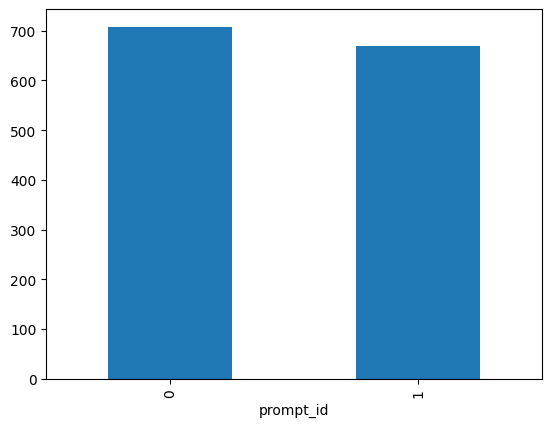

In [8]:
df_train_essays['prompt_id'].value_counts().plot(kind='bar')

<Axes: xlabel='generated'>

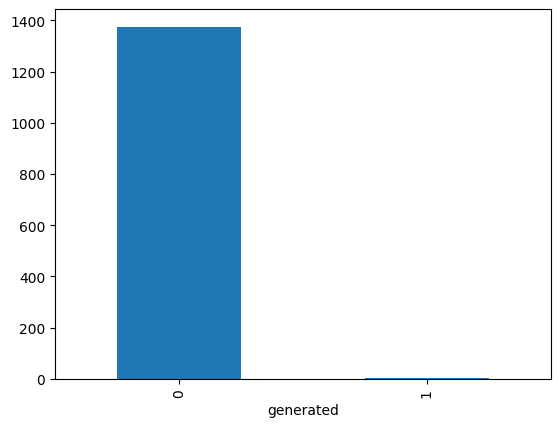

In [9]:
df_train_essays['generated'].value_counts().plot(kind='bar')

## **The dataset provided was found to be unbalanced, consisting mostly of human-written text.**

## Essays written by Human

prompt_id : 0

prompt_name : Car-free cities

instructions : Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.


In [10]:
display(df_train_essays.query('generated==0 & prompt_id==0').head())
display(df_train_essays.query('generated==1 & prompt_id==0').head())

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


,id,prompt_id,text,generated
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


In [11]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[0]))
    print("")

id : 0059830c

prompt_id : 0

text : Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time gett

In [12]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[1]))
    print("")

id : 005db917

prompt_id : 0

text : Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and other means of transportation make going from place to place easier and faster. However there's always a negative pollution. Although mobile transportation are a huge part of daily lives, we are endangering the Earth with harmful greenhouse gases, which could be suppressed.

A small suburb community in Germany called Vauban, has started a "carfree" lifestyle. In this city, markets and stores are placed nearby homes, instead of being located by farend highways. Although Vauban is not completely carfree, 70% of Vauban families do not own cars Even a large 57% of families stated to have sold their cars to move to Vauban. Some families have even said to be less stressed depending on car transportation. Cars are responsible for about 12% of greenhouse gases, and can even be up to 50% in some carintensive areas in the United States.

Another insight to reduced

In [13]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[2]))
    print("")

id : 008f63e3

prompt_id : 0

text : "America's love affair with it's vehicles seems to be cooling" says Elisabeth rosenthal. To understand rosenthal's perspective, it is easier to suggest that America's car usage is decreasing slowly. This isn't necessarily bad in the sense that it has certain positive effects. The advantages of limiting car usage includes an increase in security and health, along with a decrease in pollution and dependence.

Firstly, when car usage is limited security and health is more likely to be guaranteed. The feeling of being secure is highly important to individuals everywhere. For example, many people in colombia used public transportation during a car free day "leaving the streets of this capital city ", according to Andrew Selsky, "eerily devoid of traffic jams". The complications that stem from traffic jams end with a feeling of confidence. The plan to get from point A to B was more simple just a second ago. This complication in your personal plans leads y

In [14]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[1262]))
    print("")

id : eafb8a56

prompt_id : 0

text : Limiting car use causes pollution, increases costs to users regardless of where services or services are offered. Furthermore, over use of the gas results in increased environmental degradation, harming our resources while damaging our environment.

When consumers pay a larger amount before gasoline is refined then there are higher costs of running the engine than otherwise. There are fewer places where the gas can be purchased locally causing more problems. Car trips will usually have higher tolls which results in lost wages for the transportation worker, who goes to an unnecessary location for work and then returns home and gets to pay back his transportation back costs. The car accident rate amongst children also has increased. Car pollution can become airborne easily, contaminating children's health. Also children tend to be more careless and more often in accidents simply because of being pushed out of their cars onto the road. All of this can 

## Essays written by LLM

prompt_id : 1

prompt_name : Does the electoral college work?

instructions : Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.

In [15]:
display(df_train_essays.query('generated==0 & prompt_id==1').head())
display(df_train_essays.query('generated==1 & prompt_id==1').head())

,id,prompt_id,text,generated
5,00da8c32,1,The electrol college system is an unfair syste...,0
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0
8,01c6e176,1,"""It's official: The electoral college is unfai...",0
9,0202ddf9,1,The Electoral College has been kept for centur...,0
10,020a5d6d,1,"Dear senator, Retain the Electoral College. Th...",0


,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1


In [16]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[5]))
    print("")

id : 00da8c32

prompt_id : 1

text : The electrol college system is an unfair system, people don't have the right to select their own president, they dont have the right to select a president. Because, when people vote they are technically voting for the electors for a candied. That candidate can be a democratic or a republican. In source two it states that electors can choose there opposing candidate. Which declines the the whole voting process. Why do we vote? we vote to select a leader who will defend this country and make america a place of opportunity. The most important reason why the electrol cllege is unfair because of the " winners it take all" rule.

We as american people cannot choose their own government, as it says in source two, that when voters vote they are voting for the candidates electors. Each state gets one vote and then the electors can choose who they want for president. In source two it states that the electoral college consists of 538 electors and the most amou

In [17]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[6]))
    print("")

id : 011dc2bc

prompt_id : 1

text : Dear state senator, It is the utmost respect that I ask for the method for presidential election be changed from the electoral college to something more suitable for the opinion of the people. The electoral college is an unfair system to the people, it can allow for individuals to decide what to do with the votes, not by the people of the United States of America.

Revising the electoral college system may seem like a bad idea but the good that could come of it overlies the bad. If the election of a president was based directly by the voters , then candidates could promise money to the people who vote for himher. There could also be other problems with direct democracy such as what would happen in the chance of a tie? Who would break the tie? And how would it be decided fairly. The electoral college shouldn't be removed, but should definitely be revised.

The electoral college permits the power of the electoral votes to go to whoever the choose. The

In [18]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[8]))
    print("")

id : 01c6e176

prompt_id : 1

text : "It's official: The electoral college is unfair, outdated, and irrational" Plumer, Source 2. Many do not like the electoral college for these reasons and many others such as it can be a disaster or because it is just plain dumb. Also there are a few reasons why the electoral college should be kept such as avoiding runoff elections or big states, but those not in favor of it out weigh those in favor of it. The people who despise the electoral college are in favor of popular vote since it is the better choice.

For various reasons the electoral college is unfair such as not everyones decisions count just those few people in the electoral college. In a popular vote election everyones vote counts not just those who are considered better than us because they hold authority over people. Those people can also be sneaky and can change votes to be in favor of their choice of president. They will even take bribes sometimes just because they can even though us

In [19]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[704]))
    print("")

id : 82131f68

prompt_id : 1

text : This essay will analyze, discuss and prove one reason in favor of keeping the Electoral College in the United States for its presidential elections. One of the reasons to keep the electoral college is that it is better for smaller, more rural states to have more influence as opposed to larger metropolitan areas that have large populations. The electors from these states are granted two votes each. Those from larger, more populated areas are granted just one vote each. Smaller states tend to hold significant power because their two votes for president and vice president add up more than the votes of larger states that have many electors. This is because of the split of the electoral votes. Some argue that electors are not bound to vote for the candidate who won the most votes nationally. They do not have to vote for their own state's nominee unless their state has a winner take all system. However, there are states that have adopted laws that force t

In [20]:
for c in df_train_essays.columns:
    print("{} : {}".format(c, df_train_essays[c].iloc[740]))
    print("")

id : 86fe4f18

prompt_id : 1

text : I strongly believe that the Electoral College should remain the way it is or, better yet, that we should elect the president by popular vote. This is due to the fact that the Electoral College does not accurately reflect the will of the people. For example, in the 2016 presidential election, an estimated two million more people voted for Hillary Clinton than for Donald Trump however, Trump won the Electoral College vote, 304 to 232. This means that a candidate can win a majority of the Electoral College voters while losing the popular vote! Furthermore, voting for President should be an individual citizen decision, not a state decision. The Electoral College works by awarding all of a state's electoral votes to the winner of the majority of votes in the state. This means that a candidate can win the majority of votes in a state and still not receive any of that states electoral votes. This goes against the concept of onepersononevote, since a candid

# **LLM written texts may tend to be shorter. However, the number of data on LLM sentences is small, so the validity is low.**

## Create features

In [21]:
df_train_essays['N_words'] = df_train_essays['text'].apply(lambda x: x.count(" "))
df_train_essays['N_sentences'] = df_train_essays['text'].apply(lambda x: x.count("."))
df_train_essays['N_lines'] = df_train_essays['text'].apply(lambda x: x.count("\n"))

In [22]:
# %%time
# df_train_essays['N_typos'] = df_train_essays['text'].apply(lambda x: count_typos(x)) # it took 1h.

In [23]:
df_train_essays.iloc[[0,1,2,1262]]

,id,prompt_id,text,generated,N_words,N_sentences,N_lines
0,0059830c,0,Cars. Cars have been around since they became ...,0,580,26,6
1,005db917,0,Transportation is a large necessity in most co...,0,457,26,8
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,739,48,8
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1,286,15,4


In [24]:
df_train_essays.iloc[[5,6,8,704,740]]

,id,prompt_id,text,generated,N_words,N_sentences,N_lines
5,00da8c32,1,The electrol college system is an unfair syste...,0,577,21,8
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0,426,24,10
8,01c6e176,1,"""It's official: The electoral college is unfai...",0,466,33,8
704,82131f68,1,"This essay will analyze, discuss and prove one...",1,234,11,0
740,86fe4f18,1,I strongly believe that the Electoral College ...,1,257,10,0


**`test_essays.csv`**

In [25]:
describe_dataframe(df_test_essays)

df.head: 


,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.



df.describe: 


,prompt_id
count,3.0
mean,3.0
std,1.0
min,2.0
25%,2.5
50%,3.0
75%,3.5
max,4.0



df.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


None


Shape:
 (3, 3)

Rate of NA:
 id           0.0
prompt_id    0.0
text         0.0
dtype: float64

Rate of duplicated:
 0.0



**`sample_submission.csv`**

In [26]:
describe_dataframe(df_sample_submission)

df.head: 


,id,generated
0,0000aaaa,0.1
1,1111bbbb,0.9
2,2222cccc,0.4



df.describe: 


,generated
count,3.000000
mean,0.466667
std,0.404145
min,0.100000
25%,0.250000
50%,0.400000
75%,0.650000
max,0.900000



df.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3 non-null      object 
 1   generated  3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


None


Shape:
 (3, 2)

Rate of NA:
 id           0.0
generated    0.0
dtype: float64

Rate of duplicated:
 0.0



# 3. Data preparation
- **Data Preprocessing** 
    - Add extra dataset : [Other dataset](https://www.kaggle.com/code/suyashkapil/detecting-llm-generated-texts)
    - Drop duplicated : True
    - Drop na : False, there were no NA so no needed.
- **Implementation** : 
    - Metric : AUC by [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
    - Pipeline : 
        - Feature extraction
            - Tokenizing text : Clean text, including lowercasing and removal of stop words in fuction `tokenize()`
            - Embedding text : `CountVector()` and `tf-idfTransfomer()` by scikit-learn
            - Detecting staring verb : `StartingVerbExtractor()`
            - Counting number of words, sentences and lines : Count the stats as log scale in `TextStatsExtractor()` 
        - Classification
            - `Random forest` or `LightGBM`
    - Other technics :     
        - Grid search : `ngram_range` in CountVectorizer, ((1, 1), (1, 2))
- **Refinement** : 
    - Feature : 
    - Classification : LightGBM
    - Grid search : 

In [27]:
dataset_1_loc ='/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v6.csv'
aug_data1 = pd.read_csv(dataset_1_loc)
aug_data1 = aug_data1[aug_data1["prompt_id"]==2]
aug_data1["prompt_id"]=aug_data1['prompt_id']-2
aug_data1

,prompt_id,text,prompt_name,generated
3500,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3501,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3502,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3503,0,Car-free cities have become increasingly popu...,Car-free cities,1
3504,0,Car-free cities are a growing concept in toda...,Car-free cities,1
...,...,...,...,...
4195,0,The concept of car-free cities is becoming in...,Car-free cities,1
4196,0,Car-free cities: a vision for a healthier and...,Car-free cities,1
4197,0,The concept of car-free cities has gained pop...,Car-free cities,1
4198,0,Car-free cities are cities where cars are not...,Car-free cities,1


In [28]:
dataset_2_loc = '/kaggle/input/llm-mistral-7b-instruct-texts/Mistral7B_CME_v7.csv'
aug_data2 = pd.read_csv(dataset_2_loc)
aug_data2 = aug_data2[aug_data2["prompt_id"]==12]
aug_data2["prompt_id"]=aug_data2['prompt_id']-11
aug_data2

,prompt_id,text,prompt_name,generated
4200,1,The electoral college is a system that is use...,Does the electoral college work?,1
4201,1,The electoral college system that is used to ...,Does the electoral college work?,1
4202,1,The electoral college is a system used in the...,Does the electoral college work?,1
4203,1,The electoral college is a system in which ci...,Does the electoral college work?,1
4204,1,The Electoral College is a system used in the...,Does the electoral college work?,1
...,...,...,...,...
4895,1,The electoral college is one of the most disc...,Does the electoral college work?,1
4896,1,"Dear Sen. [Name],\n\nI am writing to express ...",Does the electoral college work?,1
4897,1,The electoral college is a system that is use...,Does the electoral college work?,1
4898,1,A strong electoral system is vital to the fun...,Does the electoral college work?,1


In [29]:
aug_data_mistral = pd.concat([aug_data1,aug_data2],axis=0)
aug_data_mistral

,prompt_id,text,prompt_name,generated
3500,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3501,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3502,0,Car-free cities are becoming increasingly pop...,Car-free cities,1
3503,0,Car-free cities have become increasingly popu...,Car-free cities,1
3504,0,Car-free cities are a growing concept in toda...,Car-free cities,1
...,...,...,...,...
4895,1,The electoral college is one of the most disc...,Does the electoral college work?,1
4896,1,"Dear Sen. [Name],\n\nI am writing to express ...",Does the electoral college work?,1
4897,1,The electoral college is a system that is use...,Does the electoral college work?,1
4898,1,A strong electoral system is vital to the fun...,Does the electoral college work?,1


In [30]:
google_palm = pd.read_csv('/kaggle/input/llm-generated-essay-using-palm-from-google-gen-ai/LLM_generated_essay_PaLM.csv').drop(columns=['id'])
google_palm = google_palm.drop(columns=['prompt_id'])
google_palm

,text,generated
0,## The Advantages of Limiting Car Usage\n\nIn ...,1.0
1,"The United States is a car-dependent nation, w...",1.0
2,"In recent years, there has been a growing move...",1.0
3,"In recent years, there has been a growing move...",1.0
4,"In the past few decades, the United States has...",1.0
...,...,...
1379,"Dear Senator,\n\nI am writing to you today to ...",1.0
1380,"Dear Senator,\n\nI am writing to you today to ...",1.0
1381,"Dear Senator,\n\nI am writing to you today to ...",1.0
1382,"Dear Senator,\n\nI am writing to you today to ...",1.0


In [31]:
big_set =pd.read_csv('/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_train.csv')
big_set_0_4000 = big_set[big_set['label']==0].iloc[0:4000,:] #first 2000 rows of human written texts
big_set_1_2600 = big_set[big_set['label']==1].iloc[0:2600,:] #first 600 rows of AI written texts
big_set_0_4000

,text,label
0,We should keep the Electoral College for a num...,0
2,Limiting car usage can actually be effective b...,0
4,"Dear Principal,\n\nAfter school or during scho...",0
5,"Many people think that aliens are real, but th...",0
8,I think if a student has a C average he or she...,0
...,...,...
6358,""" All of our development since World War 2 has...",0
6362,Some people do extracurricular activities and ...,0
6363,Exploring Venus would be a pretty amazing expe...,0
6366,You should participate in the Seagoing cowboys...,0


In [32]:
big_set_6600 = pd.concat([big_set_0_4000,big_set_1_2600],axis=0)
big_set_6600.rename(columns={'label':'generated'},inplace=True)
big_set_6600

,text,generated
0,We should keep the Electoral College for a num...,0
2,Limiting car usage can actually be effective b...,0
4,"Dear Principal,\n\nAfter school or during scho...",0
5,"Many people think that aliens are real, but th...",0
8,I think if a student has a C average he or she...,0
...,...,...
7005,The debate over whether children should be tau...,1
7013,I strongly believe that working in groups is ...,1
7014,The advantages of limiting car usage are evid...,1
7015,The use of E-dictionaries is increasingly popu...,1


In [33]:
aug_data_mistral = aug_data_mistral.drop(columns= ['prompt_name','prompt_id'])
aug_data_mistral

,text,generated
3500,Car-free cities are becoming increasingly pop...,1
3501,Car-free cities are becoming increasingly pop...,1
3502,Car-free cities are becoming increasingly pop...,1
3503,Car-free cities have become increasingly popu...,1
3504,Car-free cities are a growing concept in toda...,1
...,...,...
4895,The electoral college is one of the most disc...,1
4896,"Dear Sen. [Name],\n\nI am writing to express ...",1
4897,The electoral college is a system that is use...,1
4898,A strong electoral system is vital to the fun...,1


In [34]:
df_train = df_train_essays.drop(columns=['id','prompt_id'])

df_train_essays_ext = pd.concat([df_train,aug_data_mistral,big_set_6600,google_palm],axis=0)

describe_dataframe(df_train_essays_ext)

df.head: 


,text,generated,N_words,N_sentences,N_lines
0,Cars. Cars have been around since they became ...,0.0,580.0,26.0,6.0
1,Transportation is a large necessity in most co...,0.0,457.0,26.0,8.0
2,"""America's love affair with it's vehicles seem...",0.0,739.0,48.0,8.0
3,How often do you ride in a car? Do you drive a...,0.0,683.0,43.0,4.0
4,Cars are a wonderful thing. They are perhaps o...,0.0,867.0,52.0,6.0



df.describe: 


,generated,N_words,N_sentences,N_lines
count,10762.000000,1378.000000,1378.000000,1378.000000
mean,0.500558,551.295356,29.026125,7.657475
std,0.500023,159.650137,9.777594,2.238880
min,0.000000,234.000000,7.000000,0.000000
25%,0.000000,443.000000,22.000000,6.000000
50%,1.000000,520.000000,27.000000,8.000000
75%,1.000000,633.750000,34.000000,8.000000
max,1.000000,1351.000000,95.000000,30.000000



df.info: 
<class 'pandas.core.frame.DataFrame'>
Index: 10762 entries, 0 to 1383
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         10762 non-null  object 
 1   generated    10762 non-null  float64
 2   N_words      1378 non-null   float64
 3   N_sentences  1378 non-null   float64
 4   N_lines      1378 non-null   float64
dtypes: float64(4), object(1)
memory usage: 504.5+ KB


None


Shape:
 (10762, 5)

Rate of NA:
 text           0.000000
generated      0.000000
N_words        0.871957
N_sentences    0.871957
N_lines        0.871957
dtype: float64

Rate of duplicated:
 0.009477792231927152



In [35]:
df_train_essays_ext.duplicated().sum()

102

In [36]:
df_train_essays_ext = df_train_essays_ext.drop_duplicates().reset_index(drop=True)
display(df_train_essays_ext)

,text,generated,N_words,N_sentences,N_lines
0,Cars. Cars have been around since they became ...,0.0,580.0,26.0,6.0
1,Transportation is a large necessity in most co...,0.0,457.0,26.0,8.0
2,"""America's love affair with it's vehicles seem...",0.0,739.0,48.0,8.0
3,How often do you ride in a car? Do you drive a...,0.0,683.0,43.0,4.0
4,Cars are a wonderful thing. They are perhaps o...,0.0,867.0,52.0,6.0
...,...,...,...,...,...
10655,"Dear Senator,\n\nI am writing to you today to ...",1.0,NaN,NaN,NaN
10656,"Dear Senator,\n\nI am writing to you today to ...",1.0,NaN,NaN,NaN
10657,"Dear Senator,\n\nI am writing to you today to ...",1.0,NaN,NaN,NaN
10658,"Dear Senator,\n\nI am writing to you today to ...",1.0,NaN,NaN,NaN


In [37]:
df_train_essays_ext.duplicated().sum()

0

In [38]:
# df_train_essays_ext = pd.read_csv('/kaggle/input/daigt-proper-train-dataset/train_drcat_04.csv')
# df_train_essays_ext.rename(columns = {"label":"generated"}, inplace=True)
# display(df_train_essays_ext)

<Axes: xlabel='generated'>

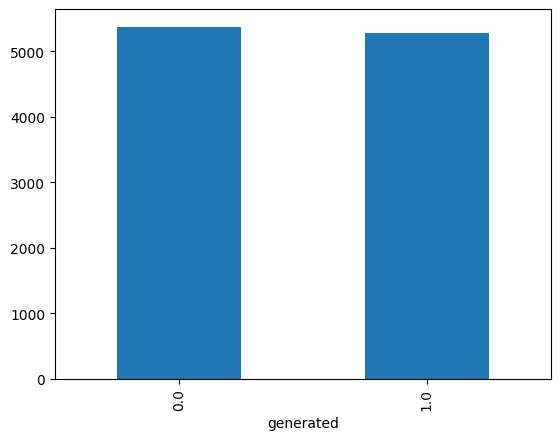

In [39]:
df_train_essays_ext['generated'].value_counts().plot(kind='bar')

## **Data imbalances have been eliminated!**

In [40]:
import re

df_train_essays_ext['N_words'] = df_train_essays_ext['text'].apply(lambda x: len(re.findall(r'\w+', x)))
df_train_essays_ext['N_words_log'] = np.log(df_train_essays_ext['N_words'])
df_train_essays_ext['N_sentences'] = df_train_essays_ext['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))
df_train_essays_ext['N_sentences_log'] = np.log(df_train_essays_ext['N_sentences'])
df_train_essays_ext['N_lines'] = df_train_essays_ext['text'].apply(lambda x: x.count("\n"))
df_train_essays_ext['N_lines_log'] = np.log(df_train_essays_ext['N_lines'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='N_words', ylabel='Count'>

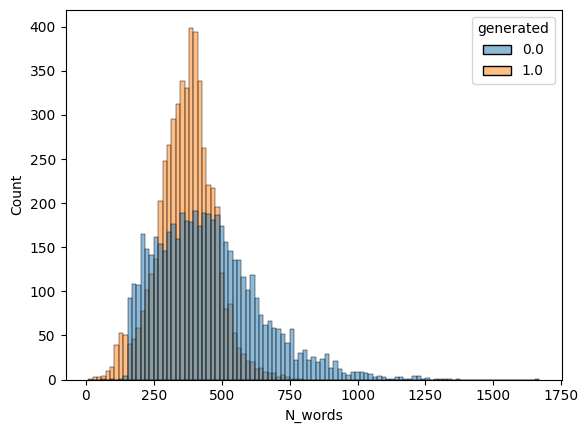

In [41]:
sns.histplot(data=df_train_essays_ext, x='N_words', hue='generated')

<Axes: xlabel='N_words_log', ylabel='Count'>

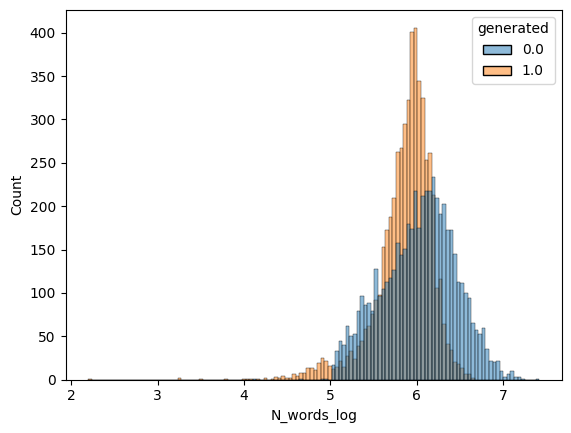

In [42]:
sns.histplot(data=df_train_essays_ext, x='N_words_log', hue='generated')

<Axes: xlabel='N_sentences', ylabel='Count'>

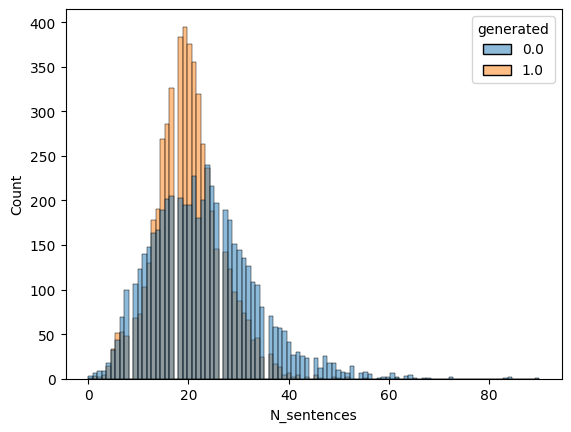

In [43]:
sns.histplot(data=df_train_essays_ext, x='N_sentences', hue='generated')

<Axes: xlabel='N_sentences_log', ylabel='Count'>

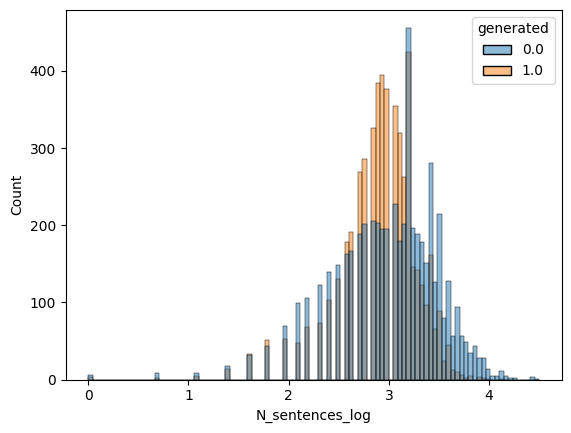

In [44]:
sns.histplot(data=df_train_essays_ext, x='N_sentences_log', hue='generated')

(-5.0, 100.0)

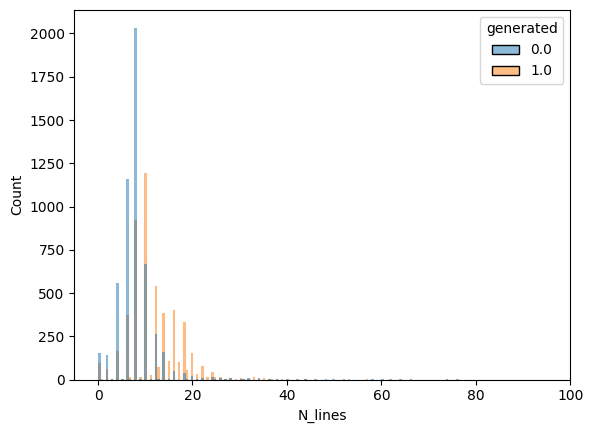

In [45]:
sns.histplot(data=df_train_essays_ext, x='N_lines', hue='generated')
plt.xlim([-5,100])

<Axes: xlabel='N_lines_log', ylabel='Count'>

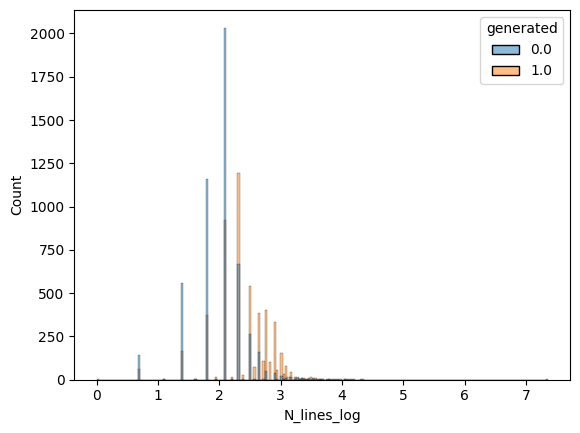

In [46]:
sns.histplot(data=df_train_essays_ext, x='N_lines_log', hue='generated')

# 4. Modeling & 5. Evaluation
- **Model Evaluation and Validation** : Shown below
- **Justification** : Visualization by t-SNE 

In [47]:
# import libraries
import nltk

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import subprocess

from sqlalchemy import create_engine

from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

from lightgbm import LGBMClassifier

In [48]:
# Download and unzip wordnet
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords'])
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [49]:
# perform train test split
X = df_train_essays_ext['text']
y = df_train_essays_ext['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## **Base model : CountVectorizer + Tf-idf + RandomForest**

In [50]:
def tokenize(text):    
    # get list of all urls using regex
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    detected_urls = re.findall(url_regex, text)
    
    # replace each url in text string with placeholder
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")
    
    # convert to lowercase
    text = text.lower()
    
    # remove punctuation characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # remove stop words
    tokens = [w for w in tokens if w not in stopwords.words("english")]

    # initiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # iterate through each token
    clean_tokens = []
    for tok in tokens:
        
        # lemmatize, normalize case, and remove leading/trailing white space
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    
    return clean_tokens

In [51]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize, token_pattern=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42))
])

In [52]:
# Fit or train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(token_pattern=None,
                                 tokenizer=<function tokenize at 0x78f0f7c4a290>)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [53]:
# predict test labels
y_test_pred = pipeline.predict(X_test)
y_test_pred_proba = pipeline.predict_proba(X_test)

In [54]:
y_test_pred, y_test_pred_proba

(array([1., 0., 0., ..., 1., 1., 1.]),
 array([[0.27, 0.73],
        [0.73, 0.27],
        [0.84, 0.16],
        ...,
        [0.02, 0.98],
        [0.22, 0.78],
        [0.07, 0.93]]))

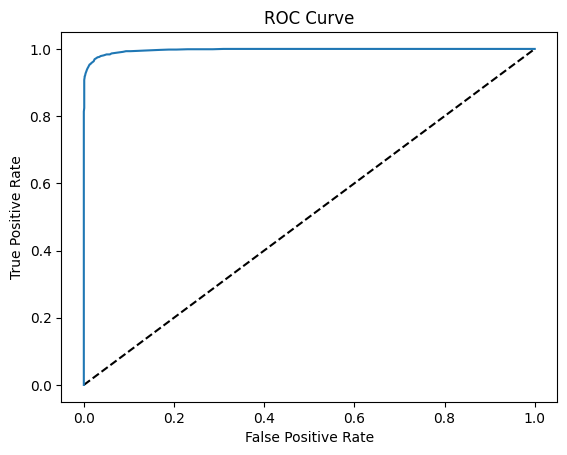

AUC: 0.9969649503271462


In [55]:
# fpr, tpr, thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate Area Under the Curve, AUC
auc_base = roc_auc_score(y_test, y_test_pred_proba[:,1])
print("AUC: {}".format(auc_base))

## **Trial 1. Changed classifier : LightGBM**


In [56]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize, token_pattern=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', LGBMClassifier(random_state=42))
])

In [57]:
# Fit or train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(token_pattern=None,
                                 tokenizer=<function tokenize at 0x78f0f7c4a290>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LGBMClassifier(random_state=42))])

In [58]:
# predict test labels
y_test_pred = pipeline.predict(X_test)
y_test_pred_proba = pipeline.predict_proba(X_test)

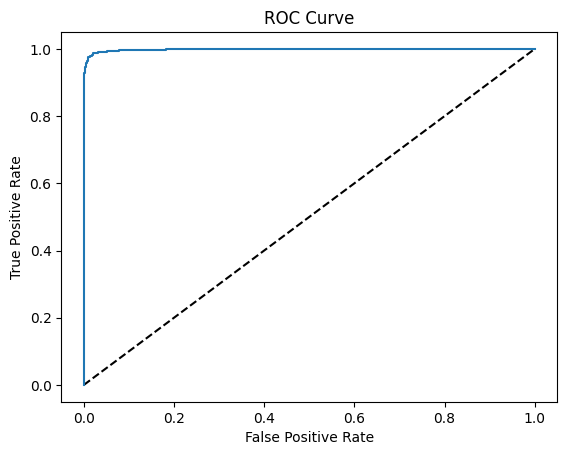

AUC: 0.9984107152133735


In [59]:
# fpr, tpr, thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate Area Under the Curve, AUC
auc_lightgbm = roc_auc_score(y_test, y_test_pred_proba[:,1])
print("AUC: {}".format(auc_lightgbm))

## **Trial 2. Added a Feature : Srating verb**


In [60]:
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        # tokenize by sentences
        sentence_list = nltk.sent_tokenize(text)
        
        for sentence in sentence_list:
            # tokenize each sentence into words and tag part of speech
            pos_tags = nltk.pos_tag(tokenize(sentence))
            
            if len(pos_tags) > 0:
                # index pos_tags to get the first word and part of speech tag
                first_word, first_tag = pos_tags[0]
            
                # return true if the first word is an appropriate verb or RT for retweet
                if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                    return 1
                
            return 0

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        # apply starting_verb function to all values in X
        X_tagged = pd.Series(X).apply(self.starting_verb)

        return pd.DataFrame(X_tagged).replace(np.nan, 0)

In [61]:
pipeline = Pipeline([
    ('features', FeatureUnion([

        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize, token_pattern=None)),
            ('tfidf', TfidfTransformer())
        ])),

        ('starting_verb', StartingVerbExtractor())
    ])),

    ('clf', RandomForestClassifier(random_state=42))
])

In [62]:
# Fit or train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(token_pattern=None,
                                                                                  tokenizer=<function tokenize at 0x78f0f7c4a290>)),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('starting_verb',
                                                 StartingVerbExtractor())])),
                ('clf', RandomForestClassifier(random_state=42))])

In [63]:
# predict test labels
y_test_pred = pipeline.predict(X_test)
y_test_pred_proba = pipeline.predict_proba(X_test)

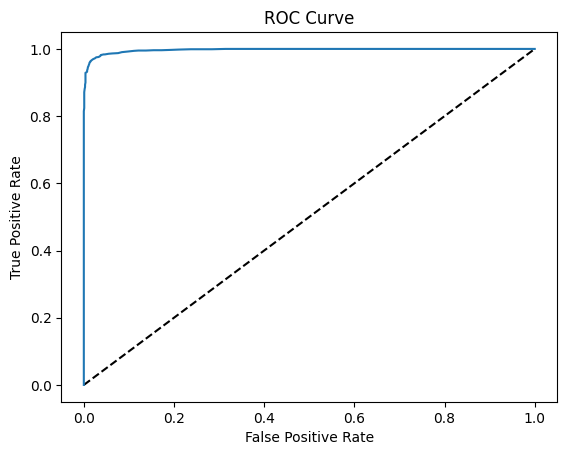

AUC: 0.996934573415712


In [64]:
# fpr, tpr, thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate Area Under the Curve, AUC
auc_staringverb = roc_auc_score(y_test, y_test_pred_proba[:,1])
print("AUC: {}".format(auc_staringverb))

## **Trial 3. Added a Feature : number of words, sentences and lines**

In [65]:
class TextStatsExtractor(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        return pd.DataFrame(posts).apply(self._get_text_stats, axis=1)

    def _get_text_stats(self, text):
        word_count = np.log(len(re.findall(r'\w+', str(text))))
        sentence_count = np.log(len(re.findall(r'[.!?]+', str(text))))
        newline_count = np.log(str(text).count('\n'))
        return pd.Series([word_count, sentence_count, newline_count], index=['N_words_log', 'N_sentences_log', 'N_newlines'])


In [66]:
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize, token_pattern=None)),
            ('tfidf', TfidfTransformer())
        ])),
        ('text_stats', TextStatsExtractor())
    ])),
    ('clf', RandomForestClassifier(random_state=42))
])

In [67]:
# Fit or train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('text_pipeline',
                                                 Pipeline(steps=[('vect',
                                                                  CountVectorizer(token_pattern=None,
                                                                                  tokenizer=<function tokenize at 0x78f0f7c4a290>)),
                                                                 ('tfidf',
                                                                  TfidfTransformer())])),
                                                ('text_stats',
                                                 TextStatsExtractor())])),
                ('clf', RandomForestClassifier(random_state=42))])

In [68]:
# predict test labels
y_test_pred = pipeline.predict(X_test)
y_test_pred_proba = pipeline.predict_proba(X_test)

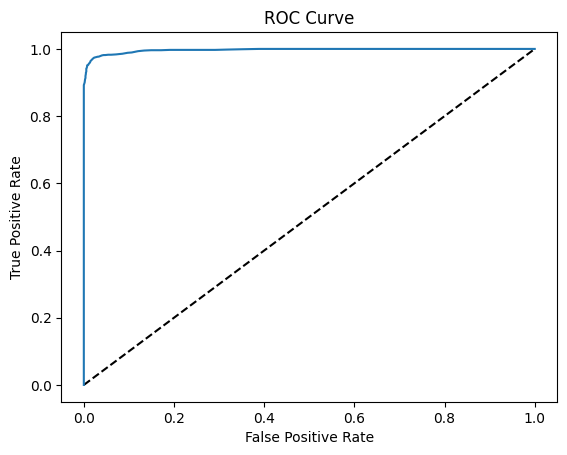

AUC: 0.9965784151352741


In [69]:
# fpr, tpr, thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate Area Under the Curve, AUC
auc_textstats = roc_auc_score(y_test, y_test_pred_proba[:,1])
print("AUC: {}".format(auc_textstats))

## **Trial 4. GridSearch : n-gram**

In [70]:
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize, token_pattern=None)),
            ('tfidf', TfidfTransformer())
        ])),
        ('starting_verb', StartingVerbExtractor()),
        ('text_stats', TextStatsExtractor())
    ])),
    ('clf', LGBMClassifier(random_state=42, n_jobs=-1))
])

In [71]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'clf', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__text_pipeline', 'features__starting_verb', 'features__text_stats', 'features__text_pipeline__memory', 'features__text_pipeline__steps', 'features__text_pipeline__verbose', 'features__text_pipeline__vect', 'features__text_pipeline__tfidf', 'features__text_pipeline__vect__analyzer', 'features__text_pipeline__vect__binary', 'features__text_pipeline__vect__decode_error', 'features__text_pipeline__vect__dtype', 'features__text_pipeline__vect__encoding', 'features__text_pipeline__vect__input', 'features__text_pipeline__vect__lowercase', 'features__text_pipeline__vect__max_df', 'features__text_pipeline__vect__max_features', 'features__text_pipeline__vect__min_df', 'features__text_pipeline__vect__ngram_range', 'features__text_pipeline__vect__preprocessor', 'features__text_pipeline__vect__stop_words', 'features__text_pipel

In [72]:
# specify parameters for grid search
parameters = {
    'features__text_pipeline__vect__ngram_range': ((1, 1), (1, 2)),
    # 'vect__max_features': [5, 100], 
    # 'clf__estimator__n_estimators': [50, 200],
}

# create grid search object
cv = GridSearchCV(pipeline, param_grid=parameters, verbose=3, cv=2)

# fit or train the classifier
cv.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END features__text_pipeline__vect__ngram_range=(1, 1);, score=0.981 total time= 6.6min
[CV 2/2] END features__text_pipeline__vect__ngram_range=(1, 1);, score=0.972 total time= 6.6min
[CV 1/2] END features__text_pipeline__vect__ngram_range=(1, 2);, score=0.978 total time= 6.7min
[CV 2/2] END features__text_pipeline__vect__ngram_range=(1, 2);, score=0.972 total time= 6.7min


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('text_pipeline',
                                                                        Pipeline(steps=[('vect',
                                                                                         CountVectorizer(token_pattern=None,
                                                                                                         tokenizer=<function tokenize at 0x78f0f7c4a290>)),
                                                                                        ('tfidf',
                                                                                         TfidfTransformer())])),
                                                                       ('starting_verb',
                                                                        StartingVerbExtractor()),
                                                                       ('text_stats',
                                                                        TextStatsExtractor())])),
                                       ('clf',
                                        LGBMClassifier(random_state=42))]),
             param_grid={'features__text_pipeline__vect__ngram_range': ((1, 1),
                                                                        (1,
                                                                         2))},
             verbose=3)

In [73]:
print("Best Parameters:", cv.best_params_)

Best Parameters: {'features__text_pipeline__vect__ngram_range': (1, 1)}


In [74]:
# predict test labels
y_test_pred_cv = cv.predict(X_test)
y_test_pred_proba_cv = cv.predict_proba(X_test)

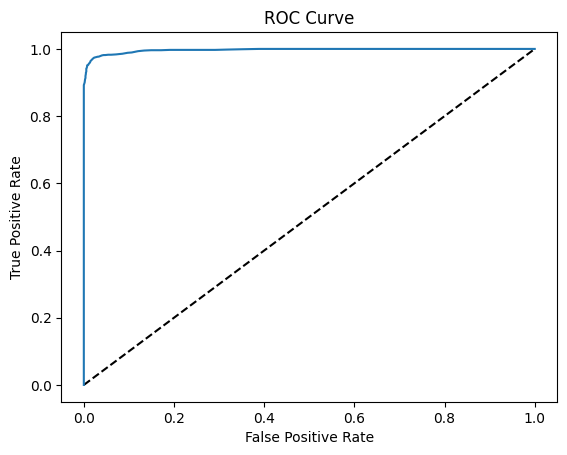

AUC: 0.9965784151352741


In [75]:
# fpr, tpr, thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:,1])

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# calculate Area Under the Curve, AUC
auc_gridsearch = roc_auc_score(y_test, y_test_pred_proba[:,1])
print("AUC: {}".format(auc_gridsearch))

## Save model and data

Text(0, 0.5, 'AUC')

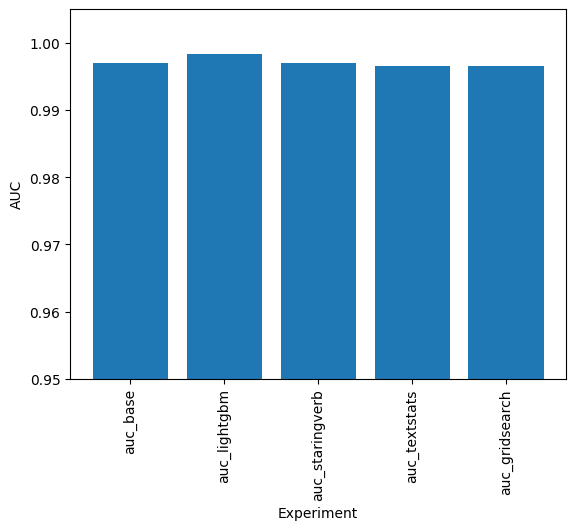

In [87]:
plt.bar(['auc_base', 'auc_lightgbm', 'auc_staringverb', 'auc_textstats', 'auc_gridsearch'],[auc_base, auc_lightgbm, auc_staringverb, auc_textstats, auc_gridsearch])
plt.xticks(rotation=90)
plt.ylim([0.95, 1.005])
plt.xlabel('Experiment')
plt.ylabel('AUC')

In [77]:
with open("model_cv.pkl", mode="wb") as f:
    pickle.dump(cv, f)

In [78]:
with open('model_cv.pkl', 'rb') as f:
    cv = pickle.load(f)

In [79]:
df_train_essays_ext[['text','generated']].to_csv('dataset_essays.csv')

## Why did the model work?

In [80]:
from sklearn.manifold import TSNE

In [81]:
df_features = pd.DataFrame(cv.best_estimator_.named_steps['features'].transform(X_test).toarray())

In [82]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(df_features)

In [83]:
df_test_features_with_tsne = pd.concat([pd.concat([pd.concat([X_test.reset_index(drop=True),y_test.reset_index(drop=True)], axis=1), df_features], axis=1), pd.DataFrame(X_reduced, columns=['Feature_tsne_1', 'Feature_tsne_2'])],axis=1)
df_test_features_with_tsne.to_csv('test_data_with_features_by_t.csv')

<Axes: xlabel='Feature_tsne_1', ylabel='Feature_tsne_2'>

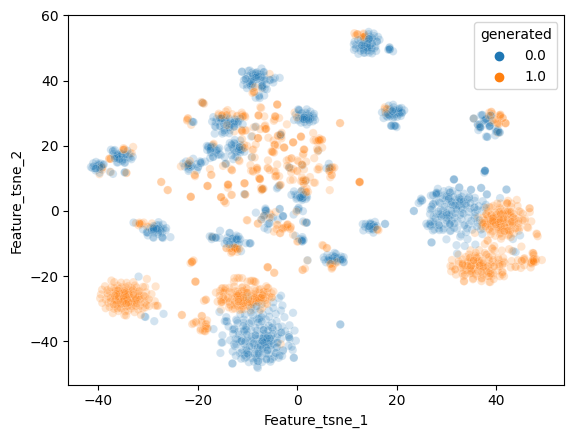

In [84]:
sns.scatterplot(data=df_test_features_with_tsne, x='Feature_tsne_1', y='Feature_tsne_2', hue='generated', alpha=0.2)

## **Looking at results of t-SNE, there is some degree of separation between the human-written essay and the LLM-written essay, although there are some areas that are not completely separated. I suspect that the pre-processing converted them into higher dimensional vectors, and that this worked well.**

# 6. Deployment
- **Submission** : 3037th on [the Kaggle Competion](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview)
- **Web App** : True
- **Blog Post** : False